# Assignment 1: Naive Bayes classification {-}

This assignment aims at familiarizing you with training and testing Naive Bayes model. You will have to:

- Load the dataset.
- Analyze the dataset.
- Split the dataset into training, validation and test set.
- Train a Gaussian Naive Bayes (GaussianNB, https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique (see GridSearchCV )
- Train a Mixed Naive Bayes (MixedNB, https://pypi.org/project/mixed-naive-bayes/) model.
- Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.

The dataset you will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment1 (e.g., ML4DS-2012345-Assigment1) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you handle the data for training and testing purpose, build a Naive Bayes classifier and evaluate the model performance. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load & Analyze the Dataset

In [42]:
data = pd.read_csv("travel-insurance.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

In [43]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB
None


In [44]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        Unnamed: 0          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


In [45]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


**There is no missing value in this dataset!**

In [46]:
# Drop unnamed column as it does not contain useful information for building the model
data = data.drop(columns=["Unnamed: 0"], axis=1)
data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [47]:
data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [48]:
# Select categorical variables columns
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]

# Encode categorical variables
data = pd.get_dummies(data, columns=cat_cols)

# Show the dataframe
data

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,1,0,1,0,1,0,1,0,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Age                                           1987 non-null   int64
 1   AnnualIncome                                  1987 non-null   int64
 2   FamilyMembers                                 1987 non-null   int64
 3   ChronicDiseases                               1987 non-null   int64
 4   TravelInsurance                               1987 non-null   int64
 5   Employment Type_Government Sector             1987 non-null   uint8
 6   Employment Type_Private Sector/Self Employed  1987 non-null   uint8
 7   GraduateOrNot_No                              1987 non-null   uint8
 8   GraduateOrNot_Yes                             1987 non-null   uint8
 9   FrequentFlyer_No                              1987 non-null   uint8
 10  FrequentFlye

In [50]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323,0.286865,0.713135,0.148465,0.851535,0.790136,0.209864,0.808757,0.191243
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332,0.452412,0.452412,0.355650,0.355650,0.407314,0.407314,0.393379,0.393379
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


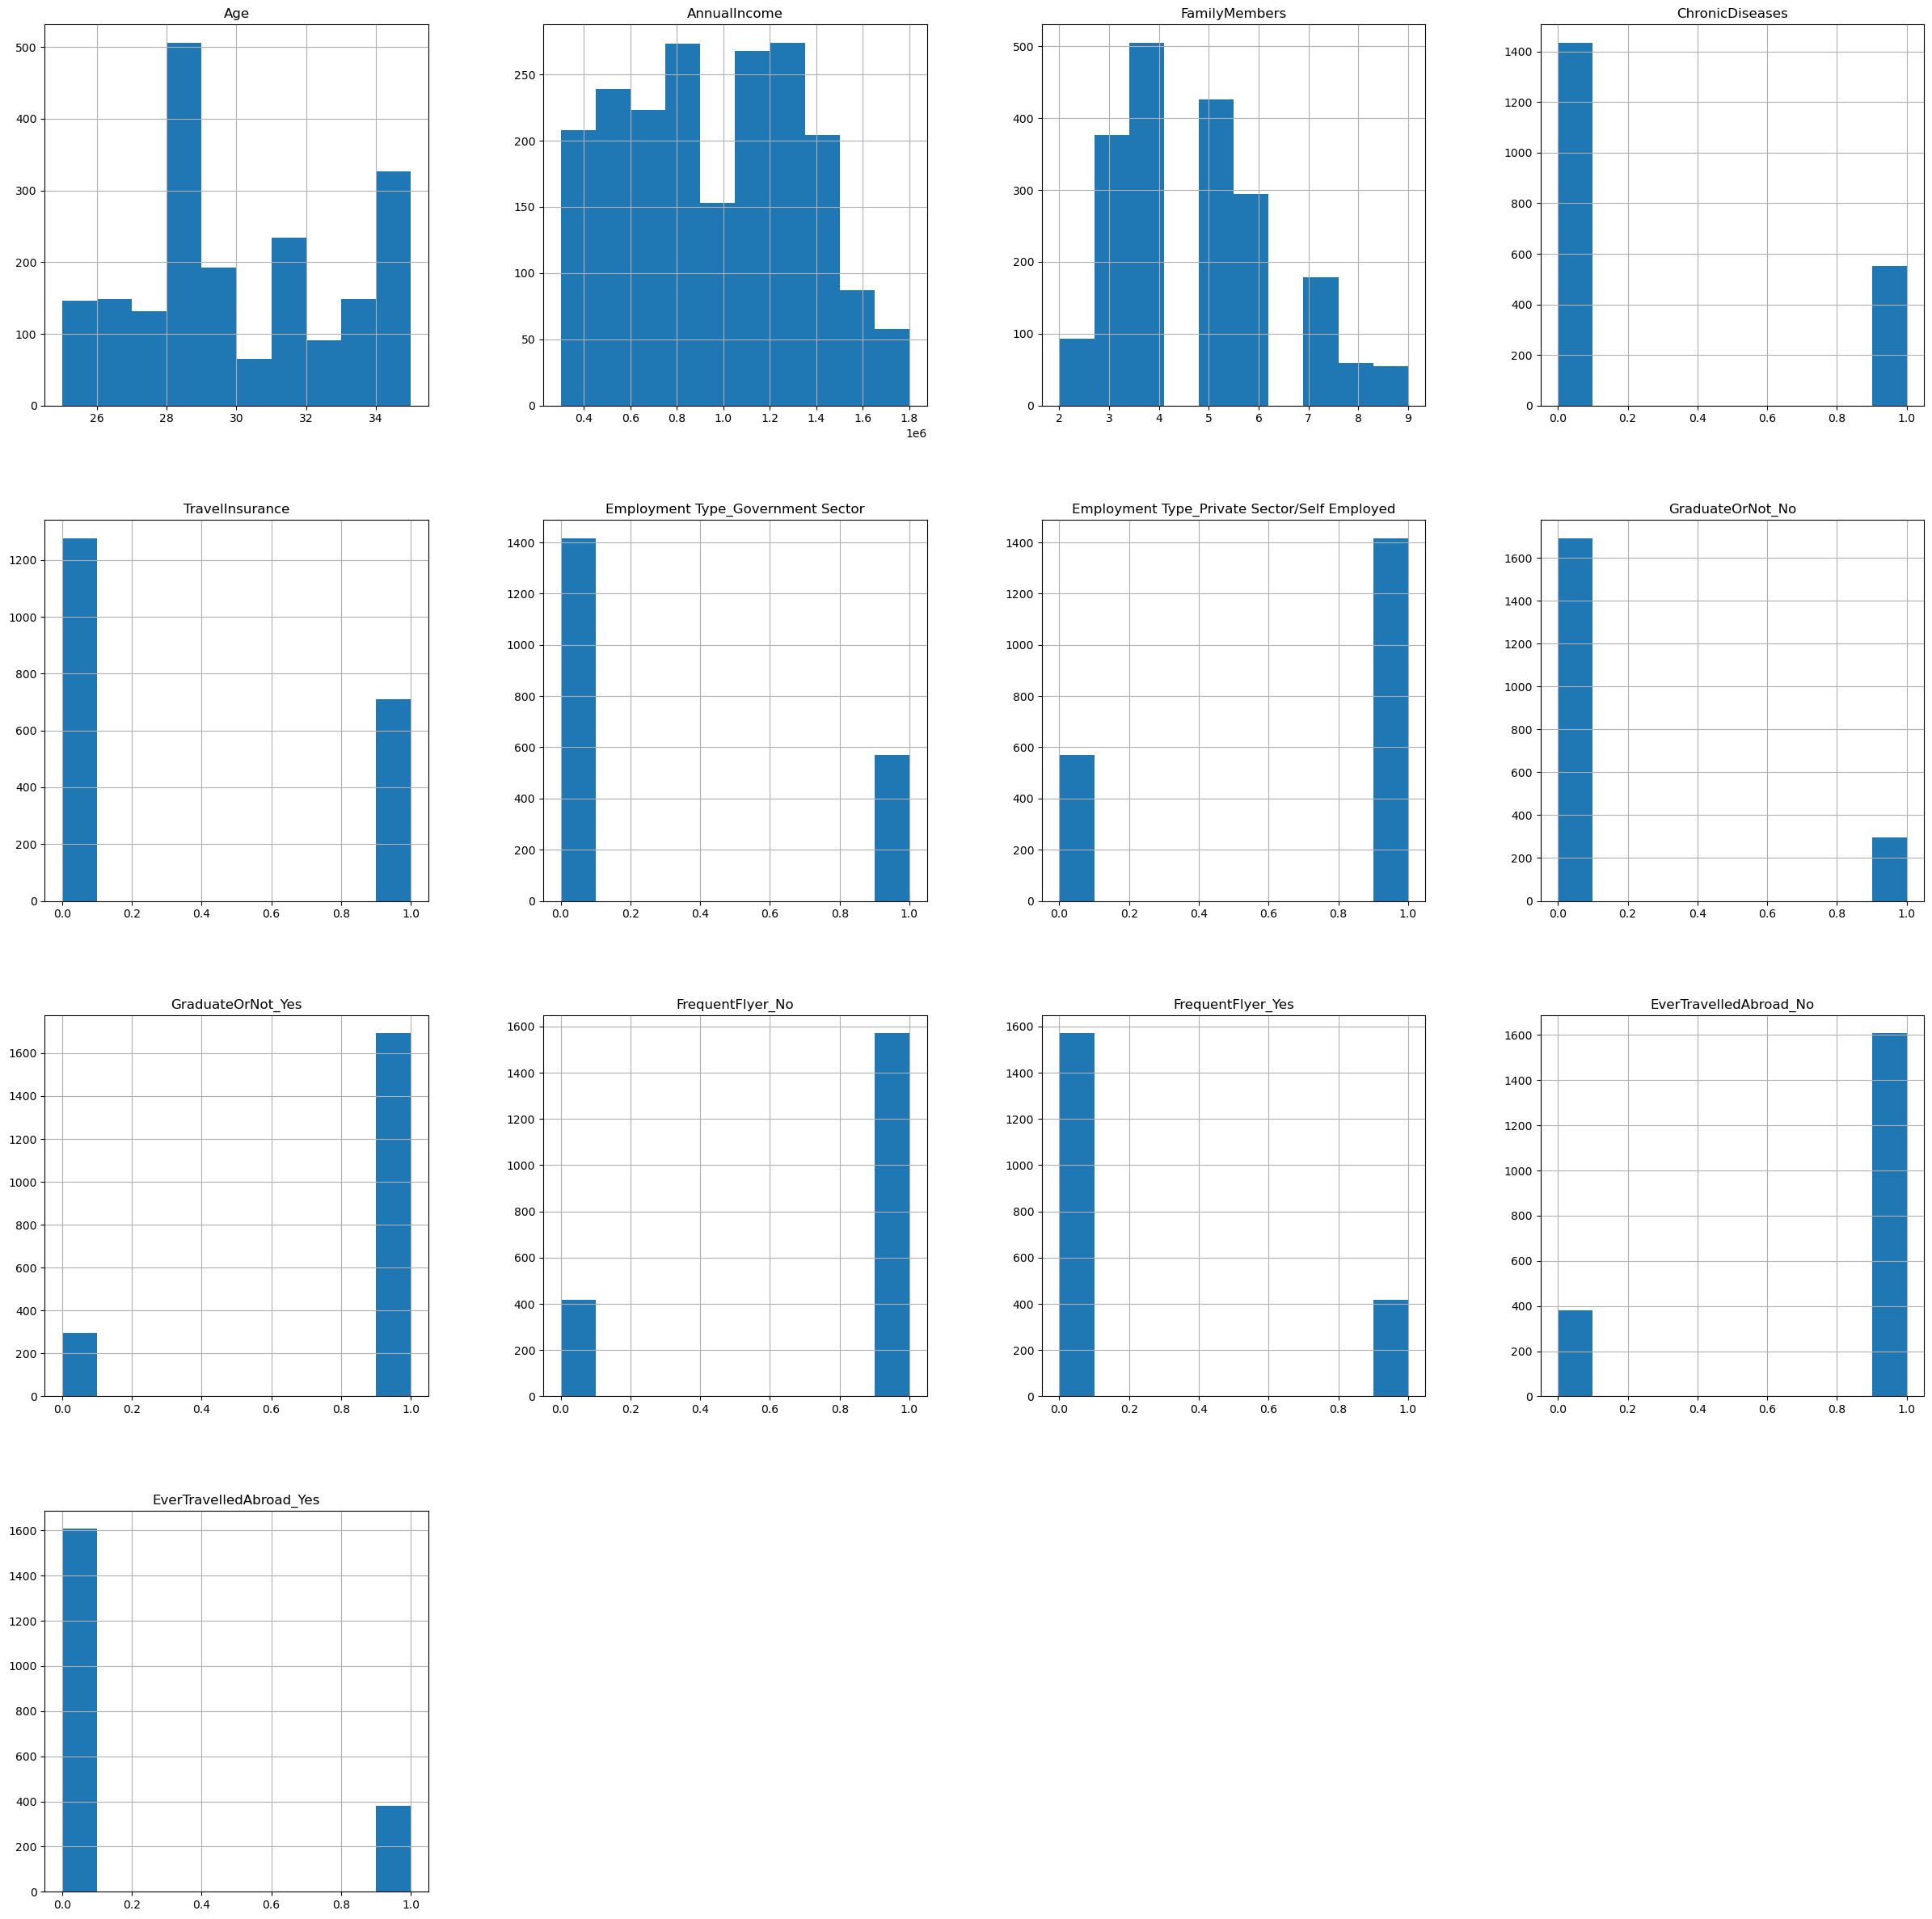

In [51]:
#Variables' distribution
data.hist(figsize=(30,30))
plt.show()

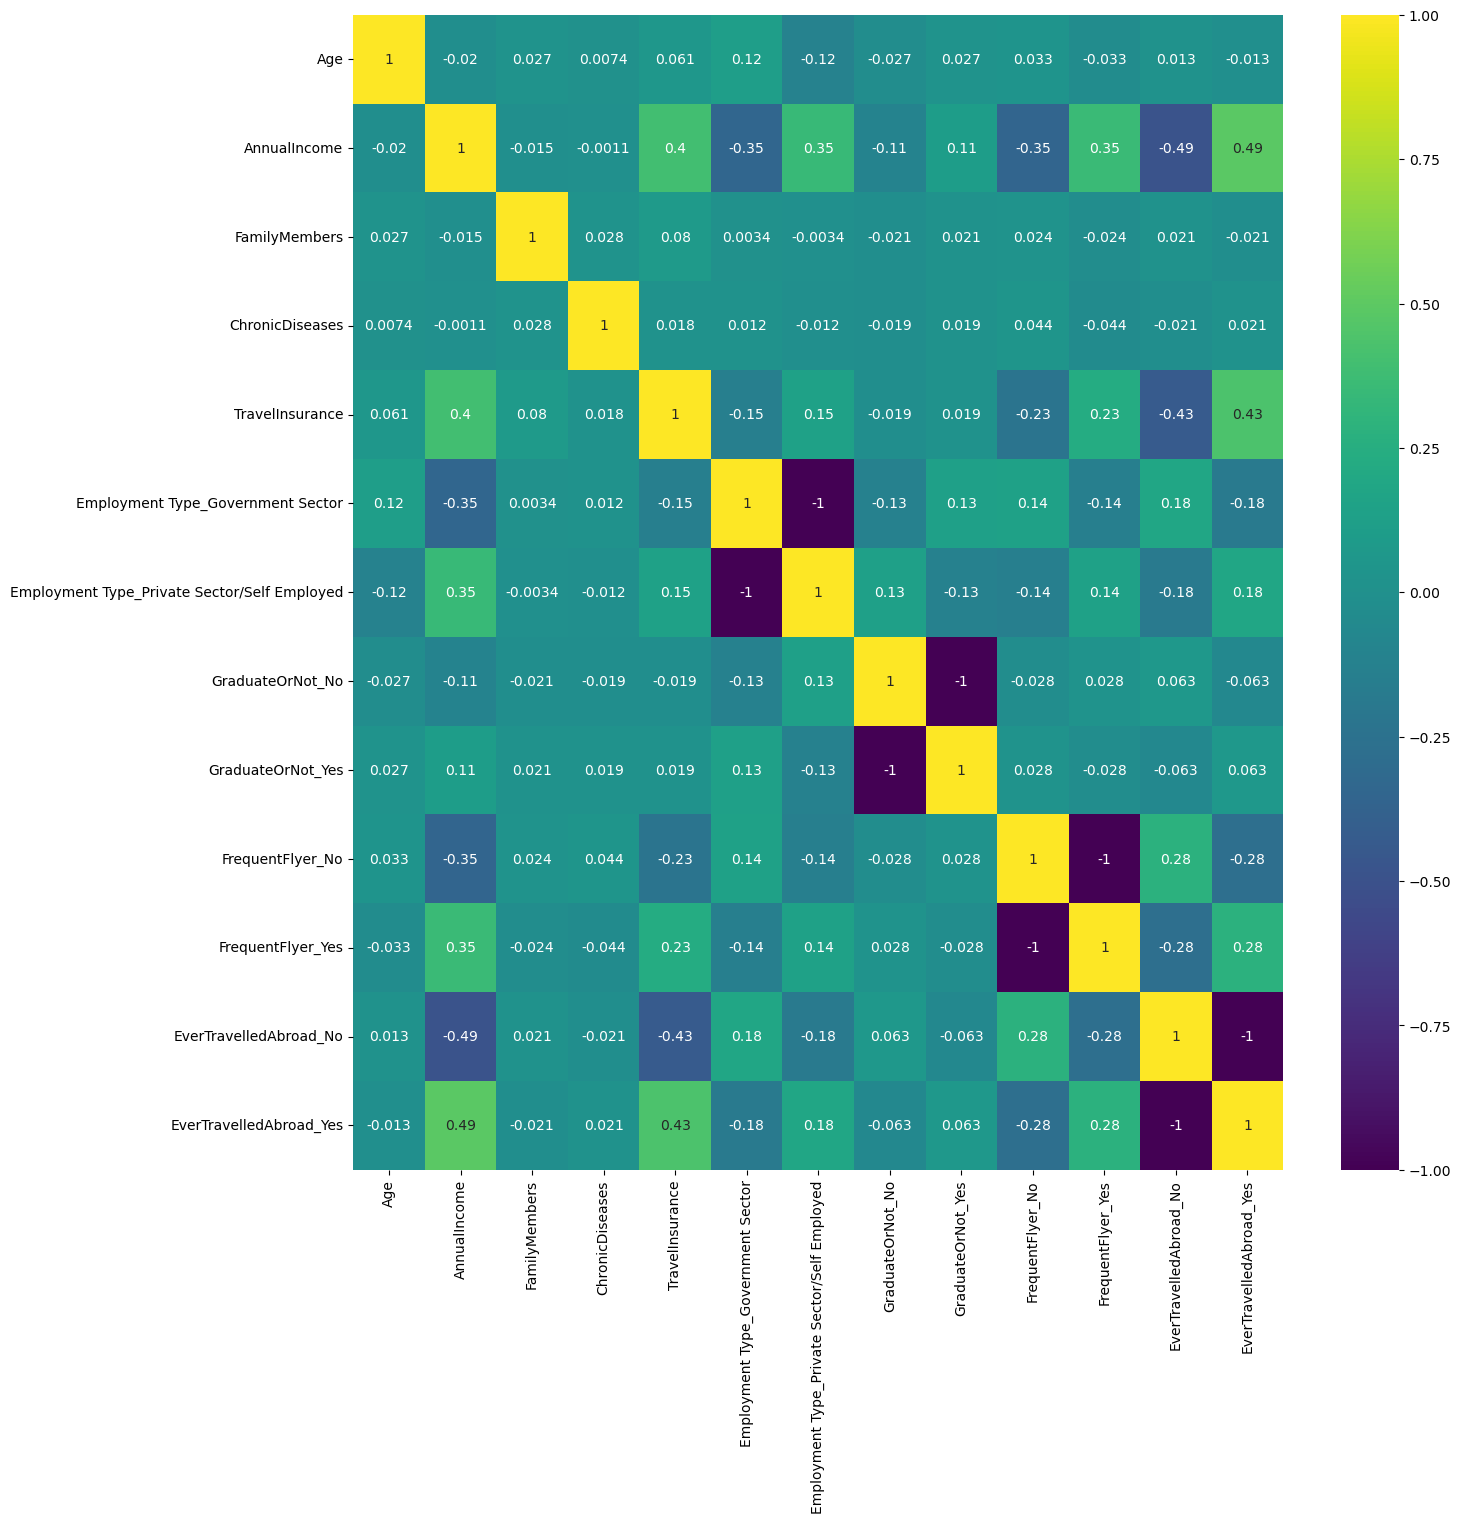

In [52]:
# Correlation heatmap between variables
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap="viridis", annot=True)
plt.show()

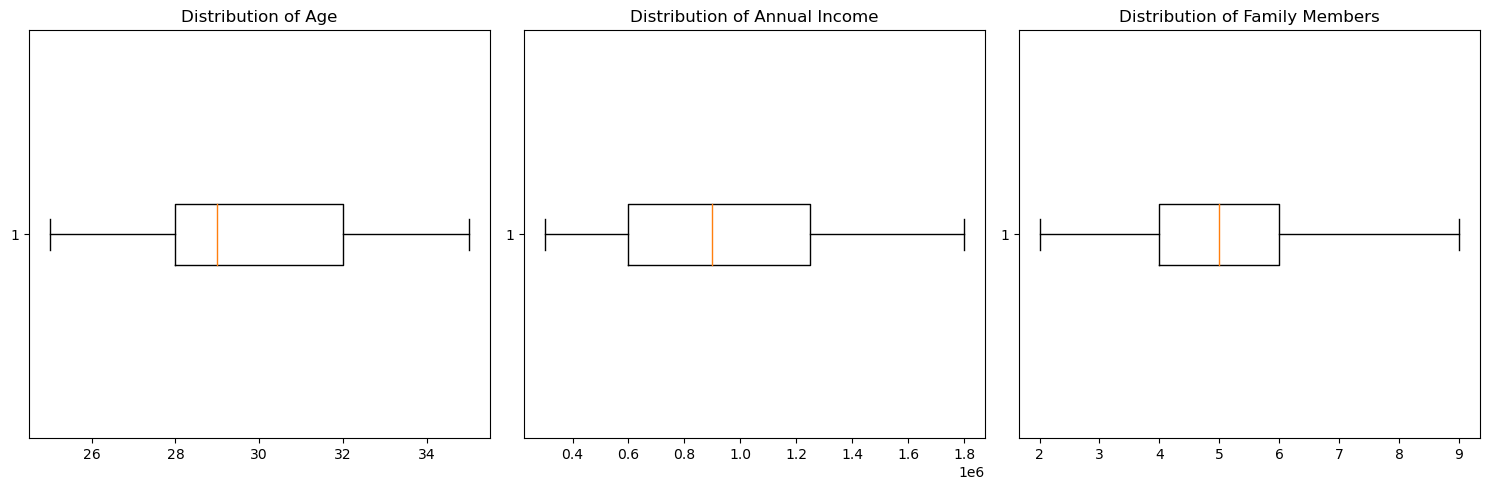

In [53]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for 'Age'
axes[0].boxplot(data['Age'], vert=False)
axes[0].set_title("Distribution of Age")

# Boxplot for 'AnnualIncome'
axes[1].boxplot(data['AnnualIncome'], vert=False)
axes[1].set_title("Distribution of Annual Income")

# Boxplot for 'FamilyMembers'
axes[2].boxplot(data['FamilyMembers'], vert=False)
axes[2].set_title("Distribution of Family Members")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


**There are no outliers in the distribution of those numerical features!**

# Split the Dataset into Training, Validation, and Test Sets

In [54]:
df = data.copy()

In [55]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop("TravelInsurance", axis=1)
y = df["TravelInsurance"]

In [56]:
X.shape

(1987, 12)

In [57]:
y.shape

(1987,)

In [63]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [66]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes Model

In [107]:
# Initialize and train Gaussian Naive Bayes model using X_normal_train (data features) and y_train (data label)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [108]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make predictions on the validation set
predicted_gnb = gnb.predict(X_test_scaled)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_gnb, y_test))
print(recall_score(predicted_gnb, y_test))
print(f1_score(predicted_gnb, y_test))
print(classification_report(predicted_gnb, y_test))


0.5379310344827586
0.6964285714285714
0.6070038910505836
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       286
           1       0.54      0.70      0.61       112

    accuracy                           0.75       398
   macro avg       0.70      0.73      0.71       398
weighted avg       0.77      0.75      0.75       398



# Cross-validation

In [109]:
# Define the values of hyperparameter var_smoothing we want to try
grid_search = {'var_smoothing': np.logspace(0, -9, num=10)}

# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 10-fold cross validation
from sklearn.model_selection import GridSearchCV
naive_cv=GridSearchCV(gnb, grid_search, cv=10, scoring = 'accuracy')

In [110]:
# Show the results of each hyperparameter var_smoothing with 10-fold cross validation
naive_scaled_plot = naive_cv.fit(X_train_scaled, y_train)
result_scaled = pd.DataFrame(naive_scaled_plot.cv_results_)
result_scaled = result_scaled.set_index('params')
result_scaled

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
params,,,,,,,,,,,,,,,,,,
{'var_smoothing': 1.0},0.001035,0.001500,0.000484,0.001069,1.0,0.789062,0.677165,0.779528,0.748031,0.787402,0.692913,0.787402,0.787402,0.755906,0.787402,0.759221,0.039681,1
{'var_smoothing': 0.1},0.000000,0.000000,0.003890,0.005249,0.1,0.742188,0.637795,0.795276,0.724409,0.755906,0.645669,0.740157,0.724409,0.763780,0.748031,0.727762,0.047197,2
{'var_smoothing': 0.01},0.000000,0.000000,0.000804,0.002412,0.01,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.732283,0.724409,0.763780,0.755906,0.722256,0.048080,10
{'var_smoothing': 0.001},0.000000,0.000000,0.003122,0.006243,0.001,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3
{'var_smoothing': 0.0001},0.003165,0.006331,0.000000,0.000000,0.0001,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3
{'var_smoothing': 1e-05},0.001563,0.004688,0.000000,0.000000,0.00001,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3
{'var_smoothing': 1e-06},0.001563,0.004688,0.000000,0.000000,0.000001,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3
{'var_smoothing': 1e-07},0.004690,0.007164,0.000000,0.000000,0.0,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3
{'var_smoothing': 1e-08},0.003125,0.006251,0.000000,0.000000,0.0,0.734375,0.637795,0.787402,0.724409,0.732283,0.629921,0.740157,0.724409,0.763780,0.755906,0.723044,0.048302,3


In [111]:
# Ranking the score of each hyperparameter var_smoothing to choose the best one
result_scaled[['mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])

,mean_test_score,rank_test_score
params,,
{'var_smoothing': 1.0},0.759221,1
{'var_smoothing': 0.1},0.727762,2
{'var_smoothing': 0.001},0.723044,3
{'var_smoothing': 0.0001},0.723044,3
{'var_smoothing': 1e-05},0.723044,3
{'var_smoothing': 1e-06},0.723044,3
{'var_smoothing': 1e-07},0.723044,3
{'var_smoothing': 1e-08},0.723044,3
{'var_smoothing': 1e-09},0.723044,3


In [114]:
print('Best Hyperparameter:',naive_scaled_plot.best_params_)

Best Hyperparameter: {'var_smoothing': 1.0}


In [115]:
naive_scaled_plot.best_score_

0.7592212106299213

In [116]:
naive_scaled = GaussianNB(var_smoothing=naive_scaled_plot.best_params_['var_smoothing']) 

# Train the model
naive_scaled.fit(X_train_scaled, y_train)  

# Test accuracy of the 'best' hyperparameter var_smoothing = 0.002
naive_scaled.score(X_test_scaled, y_test)  

0.7889447236180904

# Mixed Naive Bayes

In [114]:
# Install mixed-naive-bayes library
!pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed_naive_bayes

  Cloning https://github.com/remykarem/mixed-naive-bayes to c:\users\hanhn\appdata\local\temp\pip-install-pgiau2_8\mixed-naive-bayes_6ad7c4939cbe47c89edf531eefaca70f
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes 'C:\Users\hanhn\AppData\Local\Temp\pip-install-pgiau2_8\mixed-naive-bayes_6ad7c4939cbe47c89edf531eefaca70f'


In [117]:
from mixed_naive_bayes import MixedNB

# Initialize and train Mixed Naive Bayes model
mixed_nb = MixedNB(categorical_features=[3,4,5,6,7,8,9,10,11])
mixed_nb.fit(X_train,y_train)

# Make predictions on the validation set
pred_mixed = mixed_nb.predict(X_test)

# Evaluate performance on validation set
print("Precision (Mixed NB):", precision_score(pred_mixed,y_test))
print("Recall (Mixed NB):", recall_score(pred_mixed,y_test))
print("F1 Score (Mixed NB):", f1_score(pred_mixed,y_test))
print("Classification Report (Mixed NB):\n", classification_report(pred_mixed,y_test))

Precision (Mixed NB): 0.5310344827586206
Recall (Mixed NB): 0.7549019607843137
F1 Score (Mixed NB): 0.6234817813765182
Classification Report (Mixed NB):
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       296
           1       0.53      0.75      0.62       102

    accuracy                           0.77       398
   macro avg       0.72      0.76      0.73       398
weighted avg       0.81      0.77      0.78       398



# Evaluate and compare the model performance

In [118]:
# GNB
print('\033[1m'+"Gaussian Naive Bayes Metrics:")
print('\033[0m'+"Precision:", precision_score(predicted_gnb, y_test))
print("Recall:", recall_score(predicted_gnb, y_test))
print("F1 Score:", f1_score(predicted_gnb, y_test))
print("Classification Report:\n", classification_report(predicted_gnb, y_test))

# Mxed Naive Bayes
print('\033[1m'+"\nMixed Naive Bayes Metrics:")
print('\033[0m'+"Precision (Mixed NB):", precision_score(pred_mixed,y_test))
print("Recall (Mixed NB):", recall_score(pred_mixed,y_test))
print("F1 Score (Mixed NB):", f1_score(pred_mixed,y_test))
print("Classification Report (Mixed NB):\n", classification_report(pred_mixed,y_test))

Gaussian Naive Bayes Metrics:
Precision: 0.5379310344827586
Recall: 0.6964285714285714
F1 Score: 0.6070038910505836
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       286
           1       0.54      0.70      0.61       112

    accuracy                           0.75       398
   macro avg       0.70      0.73      0.71       398
weighted avg       0.77      0.75      0.75       398


Mixed Naive Bayes Metrics:
Precision (Mixed NB): 0.5310344827586206
Recall (Mixed NB): 0.7549019607843137
F1 Score (Mixed NB): 0.6234817813765182
Classification Report (Mixed NB):
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       296
           1       0.53      0.75      0.62       102

    accuracy                           0.77       398
   macro avg       0.72      0.76      0.73       398
weighted avg       0.81      0.77      0.78       398



**Precision:**

GaussianNB has a slightly higher precision (0.54) than Mixed Naive Bayes (0.53) for class 1 (positive class), indicating that it has a slightly better ability to correctly identify positive cases (those who purchased travel insurance) among all predicted positive cases. However, the difference is not significant.

**Recall:**

MixedNB has a higher recall (0.75) compared to GaussianNB (0.70) for class 1, implying that it can better capture the actual positive cases in the dataset. This means MNB is better at identifying individuals who purchased travel insurance among all actual positive cases.

**F1 Score:**

The F1 score of MixedNB (0.62) is slightly higher than that of GaussianNB (0.61), suggesting that MixedNB achieves a better balance between precision and recall compared to GaussianNB.

**Accuracy:**

MixedNB has a slightly higher accuracy (0.77) compared to GaussianNB (0.75), which indicates the overall correctness of the predictions of MixedNB is slightly better than that of GaussianNB.

**Conclusion:**

Both models perform reasonably well, with a balanced trade-off between precision and recall.
MixedNB performs slightly better in terms of recall and accuracy, while GaussianNB has a higher precision.